In [4]:
import pandas as pd
electricity = pd.read_excel('/home/sudeep/sources/github/pythongithub/src/ML Algorithms1/LinearRegression/CCPP/Folds5x2_pp.xlsx')
print(electricity.info())
electricity.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB
None


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


In [ ]:
# 	full name
# AT	Ambiental Temperature
# V	Exhaust Vacuum
# AP	Ambiental Pressure
# RH	Relative Humidity
# PE	Electrical Energy Output
# Let’s first decide what training set sizes we want to use for generating the learning curves. 
# The minimum value is 1. The maximum is given by the number of instances in the training set. 
# Our training set has 9568 instances, so the maximum value is 9568. 
# However, we haven’t yet put aside a validation set. 
# We’ll do that using an 80:20 ratio, ending up with a training set of 7654 instances (80%), and a validation set of 1914 instances (20%). 
# Given that our training set will have 7654 instances, the maximum value we can use to generate our learning curves is 7654. 
# For our case, here, we use these six sizes:

In [7]:
train_sizes = [1, 100, 500, 2000, 5000, 7654]
train_sizes

[1, 100, 500, 2000, 5000, 7654]

In [8]:
# An important thing to be aware of is that for each specified size a new model is trained. If you’re using cross-validation, which we’ll do in this post, k models will be trained for each training size (where k is given by the number of folds used for cross-validation). To save code running time, it’s good practice to limit yourself to 5-10 training sizes.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
features = ['AT', 'V', 'AP', 'RH']
target = 'PE'

In [9]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X= electricity[features],
y = electricity[target], train_sizes = train_sizes, cv = 5, scoring='neg_mean_squared_error')

In [12]:
train_sizes, train_scores, validation_scores

(array([   1,  100,  500, 2000, 5000, 7654]),
 array([[ -0.        ,  -0.        ,  -0.        ,  -0.        ,
          -0.        ],
        [-19.71230701, -18.31492642, -18.31492642, -18.31492642,
         -18.31492642],
        [-18.14420459, -19.63885072, -19.63885072, -19.63885072,
         -19.63885072],
        [-21.53603444, -20.18568787, -19.98317419, -19.98317419,
         -19.98317419],
        [-20.47708899, -19.93364211, -20.56091569, -20.4150839 ,
         -20.4150839 ],
        [-20.98565335, -20.63006094, -21.04384703, -20.63526811,
         -20.52955609]]),
 array([[-619.30514723, -379.81090366, -374.4107861 , -370.03037109,
         -373.30597982],
        [ -21.80224219,  -23.01103419,  -20.81350389,  -22.88459236,
          -23.44955492],
        [ -19.96005238,  -21.2771561 ,  -19.75136596,  -21.4325615 ,
          -21.89067652],
        [ -19.92863783,  -21.35440062,  -19.62974239,  -21.38631648,
          -21.811031  ],
        [ -19.88806264,  -21.3183303 ,  -1

In [14]:
print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-19.71230701 -18.31492642 -18.31492642 -18.31492642 -18.31492642]
 [-18.14420459 -19.63885072 -19.63885072 -19.63885072 -19.63885072]
 [-21.53603444 -20.18568787 -19.98317419 -19.98317419 -19.98317419]
 [-20.47708899 -19.93364211 -20.56091569 -20.4150839  -20.4150839 ]
 [-20.98565335 -20.63006094 -21.04384703 -20.63526811 -20.52955609]]

Validation scores:

 [[-619.30514723 -379.81090366 -374.4107861  -370.03037109 -373.30597982]
 [ -21.80224219  -23.01103419  -20.81350389  -22.88459236  -23.44955492]
 [ -19.96005238  -21.2771561   -19.75136596  -21.4325615   -21.89067652]
 [ -19.92863783  -21.35440062  -19.62974239  -21.38631648  -21.811031  ]
 [ -19.88806264  -21.3183303   -19.68228562  -21.35019525  -21.75949097]
 [ -19.9046791   -21.33448781  -19.67831137  -21.31935146  -21.73778949]]


In [16]:
validation_scores.shape, len(validation_scores)

((6, 5), 6)

In [29]:
# To plot the learning curves, we need only a single error score per training set size, not 5. For this reason, in the next code cell we take the mean value of each row and also flip the signs of the error scores (as discussed above).
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis = 1)


In [30]:
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       -0.000000
100     18.594403
500     19.339921
2000    20.334249
5000    20.360363
7654    20.764877
dtype: float64

 --------------------

Mean validation scores

 1       423.372638
100      22.392186
500      20.862362
2000     20.822026
5000     20.799673
7654     20.794924
dtype: float64


(0, 40)

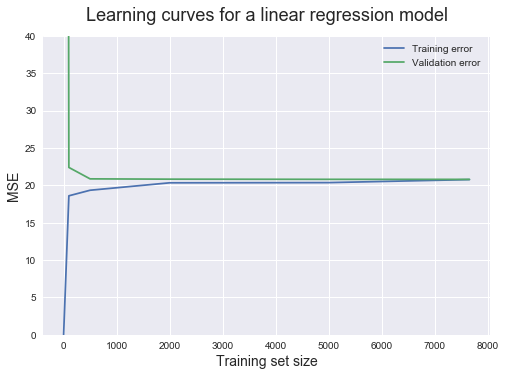

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

In [ ]:
# There’s a lot of information we can extract from this plot. Let’s proceed granularly. When the training set size is 1, we can see that the MSE for the training set is 0. This is normal behavior, since the model has no problem fitting perfectly a single data point. So when tested upon the same data point, the prediction is perfect. But when tested on the validation set (which has 1914 instances), the MSE rockets up to roughly 423.4. This relatively high value is the reason we restrict the y-axis range between 0 and 40. This enables us to read most MSE values with precision. Such a high value is expected, since it’s extremely unlikely that a model trained on a single data point can generalize accurately to 1914 new instances it hasn’t seen in training. When the training set size increases to 100, the training MSE increases sharply, while the validation MSE decreases likewise.

# The linear regression model doesn’t predict all 100 training points perfectly, so the training MSE is greater than 0. However, the model performs much better now on the validation set because it’s estimated with more data. From 500 training data points onward, the validation MSE stays roughly the same. This tells us something extremely important: adding more training data points won’t lead to significantly better models. So instead of wasting time (and possibly money) with collecting more data, we need to try something else, like switching to an algorithm that can build more complex models. 
# Technically, that value of 20 has MW (megawatts squared) as units (the units get squared as well when we compute the MSE). But the values in our target column are in MW (according to the documentation). Taking the square root of 20 MW results in approximately 4.5 MW. Each target value represents net hourly electrical energy output. So for each hour our model is off by 4.5 MW on average. According to this Quora answer, 4.5 MW is equivalent to the heat power produced by 4500 handheld hair dryers. And this would add up if we tried to predict the total energy output for one day or a longer period. We can conclude that the an MSE of 20 MW is quite large. So our model has a bias problem.

# But is it a low bias problem or a high bias problem? To find the answer, we need to look at the training error. If the training error is very low, it means that the training data is fitted very well by the estimated model. If the model fits the training data very well, it means it has low bias with respect to that set of data. If the training error is high, it means that the training data is not fitted well enough by the estimated model. If the model fails to fit the training data well, it means it has high bias with respect to that set of data. 
# A narrow gap indicates low variance. Generally, the more narrow the gap, the lower the variance. The opposite is also true: the wider the gap, the greater the variance. Let’s now explain why this is the case. As we’ve discussed earlier, if the variance is high, then the model fits training data too well. When training data is fitted too well, the model will have trouble generalizing on data that hasn’t seen in training. When such a model is tested on its training set, and then on a validation set, the training error will be low and the validation error will generally be high. As we change training set sizes, this pattern continues, and the differences between training and validation errors will determine that gap between the two learning curves.



# The relationship between the training and validation error, and the gap can be summarized this way:  So the bigger the difference between the two errors, the bigger the gap. The bigger the gap, the bigger the variance. In our case, the gap is very narrow, so we can safely conclude that the variance is low. High training MSE scores are also a quick way to detect low variance. If the variance of a learning algorithm is low, then the algorithm will come up with simplistic and similar models as we change the training sets. Because the models are overly simplified, they cannot even fit the training data well (they underfit the data). So we should expect high training MSEs. Hence, high training MSEs can be used as indicators of low variance. 
# In our case, the training MSE plateaus at around 20, and we’ve already concluded that’s a high value. So besides the narrow gap, we now have another confirmation that we have a low variance problem. So far, we can conclude that:

# Our learning algorithm suffers from high bias and low variance, underfitting the training data.
# Adding more instances (rows) to the training data is hugely unlikely to lead to better models under the current learning algorithm.
# One solution at this point is to change to a more complex learning algorithm. This should decrease the bias and increase the variance. A mistake would be to try to increase the number of training instances. Generally, these other two fixes also work when dealing with a high bias and low variance problem:

# Training the current learning algorithm on more features (to avoid collecting new data, you can generate easily polynomial features). This should lower the bias by increasing the model’s complexity.
# Decreasing the regularization of the current learning algorithm, if that’s the case. In a nutshell, regularization prevents the algorithm from fitting the training data too well. If we decrease regularization, the model will fit training data better, and, as a consequence, the variance will increase and the bias will decrease.

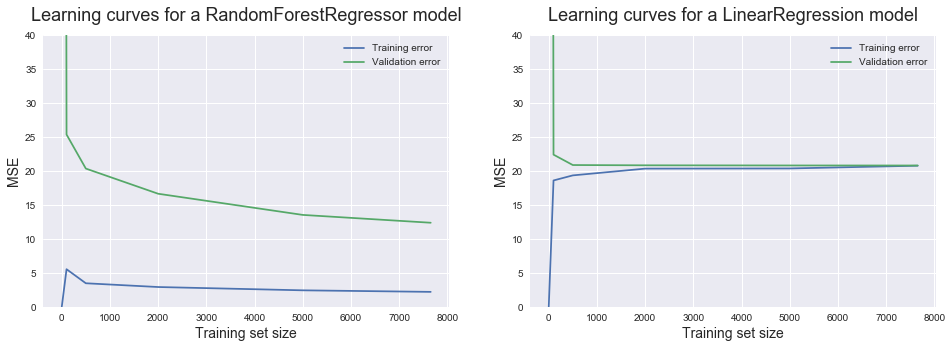

In [39]:
### Bundling our previous work into a function ###
def learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, data[features], data[target], train_sizes = train_sizes,
    cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,40)
    ### Plotting the two learning curves ###
from sklearn.ensemble import RandomForestRegressor
plt.figure(figsize = (16,5))
for model, i in [(RandomForestRegressor(), 1), (LinearRegression(),2)]:
    plt.subplot(1,2,i)
    learning_curves(model, electricity, features, target, train_sizes, 5)

In [40]:
from sklearn import preprocessing
import numpy as np

In [42]:
electricity.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [43]:
electricity_scaled = preprocessing.scale(electricity)

In [44]:
electricity_scaled

array([[-0.62951938, -0.98729659,  1.8204884 , -0.00951935,  0.52120807],
       [ 0.74190911,  0.68104512,  1.1418628 , -0.97462052, -0.58566442],
       [-1.95129733, -1.17301765, -0.18507756,  1.2898397 ,  2.00367889],
       ...,
       [ 1.56583973,  1.57581141, -0.05709854, -2.52261812, -1.45288056],
       [ 0.64797565,  1.19177803,  0.1011913 , -0.74790051, -1.09134518],
       [ 0.26150656,  0.64641916,  0.66867722, -0.37254534, -0.06357687]])

In [45]:
electricity_scaled.mean(axis=0)

array([-1.84542088e-16, -1.92710953e-16,  5.47221131e-15, -3.37522652e-16,
       -1.77190109e-15])

In [46]:
electricity_scaled.std(axis=0)

array([1., 1., 1., 1., 1.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f295153cf98>,
      dtype=object)

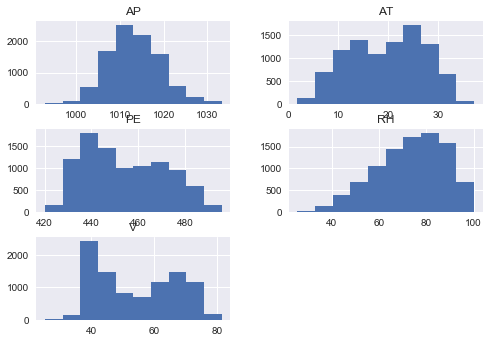

In [47]:
electricity.hist()

In [49]:
type(electricity)

pandas.core.frame.DataFrame

In [51]:
type(electricity_scaled)

numpy.ndarray

In [52]:
electricity_scaled_df= pd.DataFrame(electricity_scaled)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f295148ea90>,
      dtype=object)

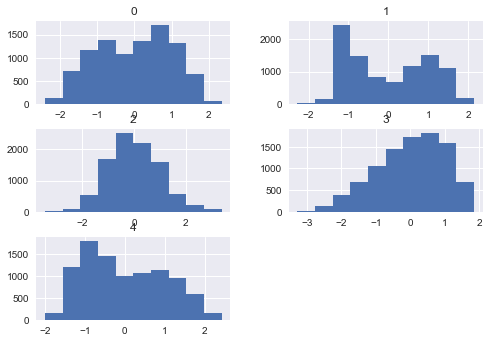

In [53]:
electricity_scaled_df.hist()

In [54]:
mu, sigma = 0, 0.1 # mean and standard deviation

In [63]:
s = np.random.normal(mu, sigma, 100)
s

array([ 0.00245653, -0.13916791,  0.19513757,  0.04120376, -0.10283476,
       -0.0996614 , -0.08245546, -0.00203296,  0.08484988, -0.0542809 ,
       -0.08381529, -0.13581828,  0.12199817,  0.01776522, -0.06001457,
        0.02577143,  0.11495967,  0.14690162,  0.10516283,  0.09929625,
       -0.10668297, -0.02018717,  0.01190236, -0.00161215,  0.10177641,
       -0.01864252, -0.1616575 , -0.03293563, -0.06862416, -0.0718215 ,
       -0.05607734, -0.27215207, -0.05544447,  0.02061291,  0.03763038,
       -0.02391798, -0.09389279, -0.02222738, -0.23302496,  0.12822833,
        0.02646671, -0.05321081,  0.03940011,  0.02073802,  0.09648218,
       -0.09629047,  0.02913263, -0.03711798, -0.14103605,  0.05152742,
       -0.19974878, -0.09467253, -0.00283486,  0.02449217,  0.08699774,
        0.12465288,  0.0227969 ,  0.18950646, -0.21588499,  0.01835035,
       -0.00406398,  0.1010719 ,  0.00930742,  0.1017378 , -0.08030449,
        0.11392574, -0.01107149, -0.12206821,  0.06955043, -0.01

In [60]:
abs(mu - np.mean(s)) < 0.01


True

In [61]:
abs(sigma - np.std(s, ddof=1)) < 0.01

True

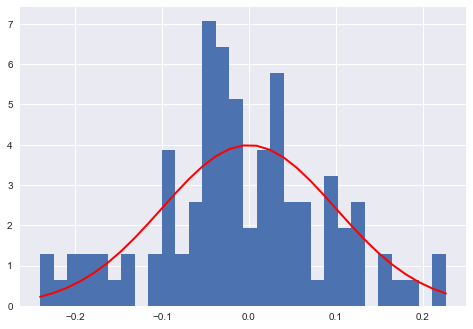

In [62]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                 np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
           linewidth=2, color='r')